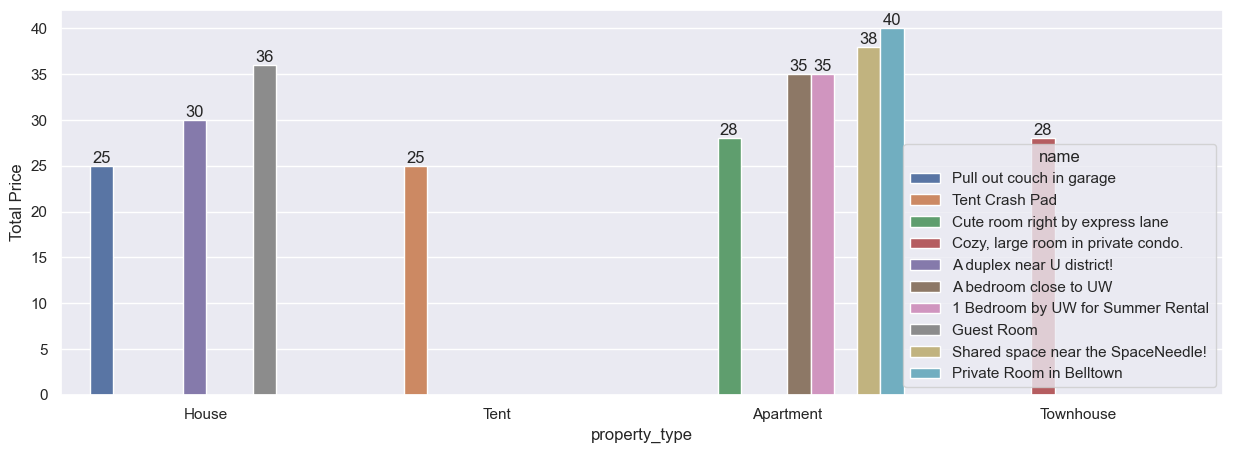

In [12]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Top 10 cheapest and popular superhost properties

# file path #
listings = r'C:\Users\XXX\Desktop_files\Udacity data sc files\listings.csv'

#read listing file #
df_listing=pd.read_csv(listings)
df_listing=df_listing[['id', 'name','amenities','property_type','room_type','price','security_deposit','cleaning_fee','availability_30','cancellation_policy']]

# specifying columns to replace the chars and replacing with <blank> #
str_cols = ['price','security_deposit','cleaning_fee']    

for col in str_cols: 
  df_listing[col] = df_listing[col].str.replace(",","").astype(str)
  df_listing[col] = df_listing[col].str.replace('$', '').astype(float)
  
df_listing=df_listing.fillna(0)
# Deriving the cheapest based on total price of price, securoty deposit and cleaning fee #
df_listing['Total Price']=df_listing[['price','security_deposit','cleaning_fee']].sum(axis=1)

#ordering by last 30 days availability to find the top 10 popular properties and the cheapest in Boston#
fnl_dta = df_listing.sort_values(['availability_30','Total Price'], ascending=[True,True]).head(10)

#plotting to show the price, type of property and property name#
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x='property_type', y='Total Price',hue='name' ,data=fnl_dta)
for container in ax.containers:
    ax.bar_label(container)


